# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

def build_mlp(input, output):
    """
    Build your own model
    """
    model = Sequential()
    model.add(Dense(256,input_dim = input, activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output, activation='softmax'))
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
from keras.optimizers import SGD, RMSprop, Adagrad, Adam

LR = 1e-3
epochs = 10
batch_size = 256
opt = [SGD,RMSprop,Adagrad,Adam]

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
from keras.optimizers import Adam
results = {}
for optimizers in opt:
    model = build_mlp(x_train.shape[1], y_train.shape[1])
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer=optimizers(lr=LR), metrics=["accuracy"])
    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_split=0.2, 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    results[optimizers] = {'train-loss': train_loss,'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 8s 190us/step - loss: 2.2879 - accuracy: 0.1629 - val_loss: 2.2530 - val_accuracy: 0.1991
Epoch 2/10
40000/40000 [========================

40000/40000 [==============================] - 9s 216us/step - loss: 1.9671 - accuracy: 0.2828 - val_loss: 1.8126 - val_accuracy: 0.3536
Epoch 2/10
40000/40000 [==============================] - 8s 212us/step - loss: 1.7417 - accuracy: 0.3765 - val_loss: 1.7323 - val_accuracy: 0.3898
Epoch 3/10
40000/40000 [==============================] - 8s 201us/step - loss: 1.6538 - accuracy: 0.4117 - val_loss: 1.6607 - val_accuracy: 0.4153
Epoch 4/10
40000/40000 [==============================] - 8s 200us/step - loss: 1.5923 - accuracy: 0.4344 - val_loss: 1.6415 - val_accuracy: 0.4167
Epoch 5/10
40000/40000 [==============================] - 8s 209us/step - loss: 1.5591 - accuracy: 0.4471 - val_loss: 1.5951 - val_accuracy: 0.4368
Epoch 6/10
40000/40000 [==============================] - 8s 201us/step - loss: 1.5201 - accuracy: 0.4603 - val_loss: 1.6167 - val_accuracy: 0.4215
Epoch 7/10
40000/40000 [==============================] - 8s 207us/step - loss: 1.4894 - accuracy: 0.4697 - val_loss: 1.590

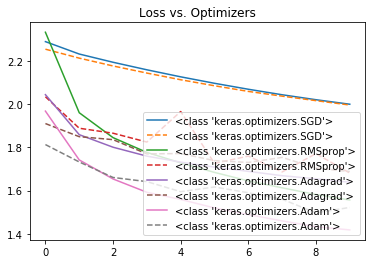

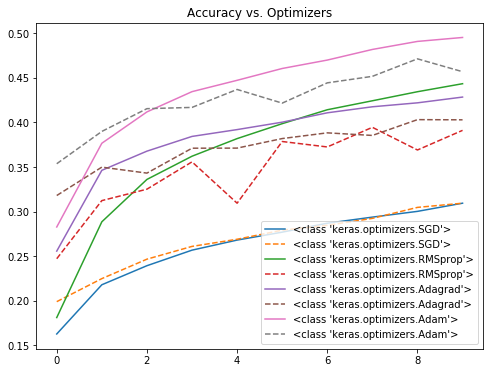

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Optimizers")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Optimizers")
plt.legend(loc=4)
plt.show()